<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">Trabajo final de master</p>
<p style="margin: 0; text-align:right;">Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Estado de la computación cuántica en el aprendizaje por refuerzo y cómo aplicarla en DQN y Reinforce con Línea Base

## Red neuronal clásica aplicada a Reinforce en entorno Acrobot



Se importan las librerías necesarias para ejecutar el Jupyter Notebook

In [1]:
# Importamos timeit para tomar mediciones de tiempo de ejecución
import timeit

# Importamos codecarbon para tomar medidas de huella de carbono
from codecarbon import EmissionsTracker

In [2]:
import sys
# Para importar nuestras librerías, que están en otro directorio
sys.path.append("../librerias")

# Librería con circuito cuántico definido
import QVC

# Modelos de aprendizaje por refuerzo
import Model

# Agentes
import Agent

In [3]:
# Se importa la librería gymnasium para utilizar los entornos CartPole y Acrobot
import gym as gym

In [4]:
import torch    # necesito la librería torch para la red neuronal

Se crea el entorno, en este caso CartPole

In [5]:
env = gym.envs.make("Acrobot-v1")

/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/marcoemiliorodriguezserrano/anaconda3/lib/python3.10/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Se definen los hiperparámetros que se utilizarán en el modelo de aprendizaje por refuerzo

In [6]:
# Hiperparámetros del modelo de aprendizaje por refuerzo
lr = 0.01            #Velocidad de aprendizaje
MAX_EPISODES = 2000   #Número máximo de episodios (el agente debe aprender antes de llegar a este valor)
GAMMA = 0.99          #Valor gamma de la ecuación de Bellman
BATCH_SIZE = 10      #Conjunto a coger del buffer para la red neuronal

Se define el circuito cuántico que sustituye a la red neuronal

In [7]:
n_inputs = env.observation_space.shape[0]
n_outputs = env.action_space.n

In [8]:
net = torch.nn.Sequential(
            torch.nn.Linear(n_inputs, 16),
            torch.nn.ReLU(),
            torch.nn.Linear(16, n_outputs))

Se crea el modelo Reinforce con línea base

In [9]:
reinforce = Model.PGReinforce(env, net, learning_rate=lr, classic=True)

Se crea el agente, se le pasa como parámetro los dos modelos inicializados que contienen un circuito cuántico

In [10]:
agent = Agent.ReinforceAgent(env, reinforce)

Se prepara el entorno para iniciar las mediciones de CO2

In [11]:
# Se define la carpeta de salida de los archivos de emisiones
output_dir = './emisiones/emisiones_Classic_Reinforce_Acrobot'

# Se crea una instancia de EmissionsTracker y se configura la carpeta de salida
tracker = EmissionsTracker(output_dir=output_dir, log_level = "critical")

# Se inicializa el seguimiento de las emisiones
tracker.start()

Iniciamos el cronómetro para medir el tiempo del proceso

In [12]:
tiempo_inicio = timeit.default_timer()

Se inicia el entrenamiento del agente

In [13]:
agent.train(gamma=GAMMA, max_episodes=MAX_EPISODES,
              batch_size=BATCH_SIZE)

Entrenando...
Episodio 618 Recompensa media -99.15			
El entorno se resolvió en 618 episodios!


Se calcula el tiempo de ejecución, lo que ha tardado el agente en entrenar

In [14]:
tiempo_ejecucion = round(timeit.default_timer() - tiempo_inicio, 0)
print("Tiempo ejecución entrenamiento: " + str(int(tiempo_ejecucion/3600))
      + " horas, " + str(int((tiempo_ejecucion % 3600)/60)) + " minutos y "
      + str(int((tiempo_ejecucion % 3600)%60)) + " segundos")


Tiempo ejecución entrenamiento: 0 horas, 0 minutos y 42 segundos


Se calculan las emisiones que han podido implicar el proceso

In [15]:
emisiones = tracker.stop()
print("Emisiones de CO2 (Kg)" + str(emisiones))

Emisiones de CO2 (Kg)3.7987400781283934e-05


Se procede a graficar los resultados

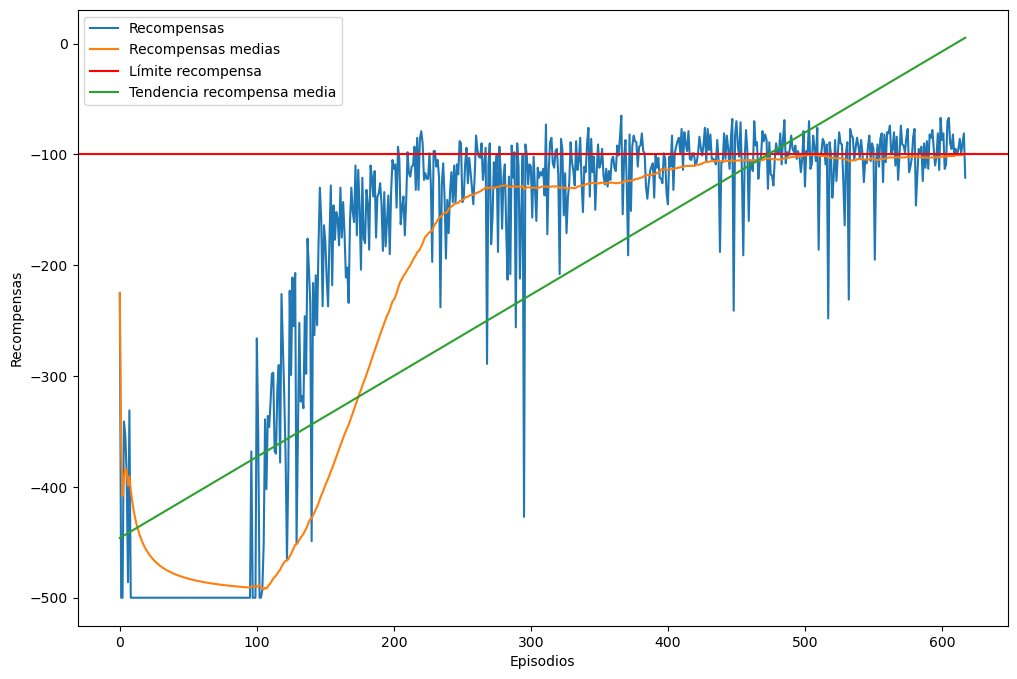

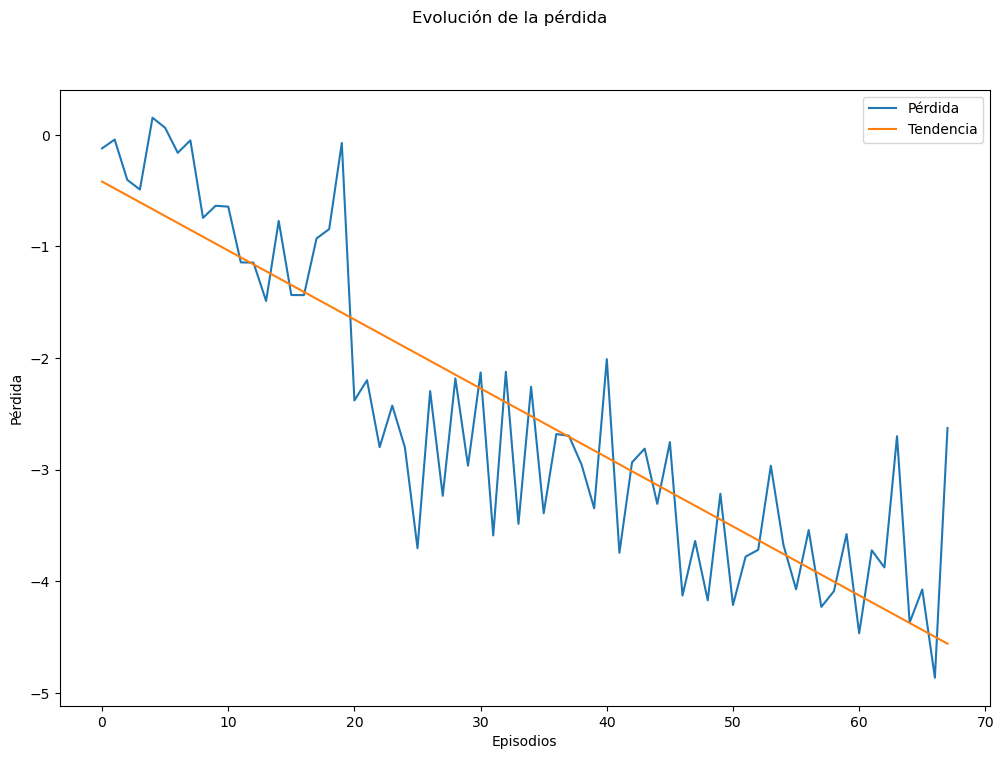

In [16]:
agent.plot_rewards()
agent.plot_loss()